In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from desdeo_problem import MOProblem
from desdeo_problem.testproblems.TestProblems import test_problem_builder
from desdeo_emo.EAs.IBEA import IBEA
from desdeo_emo.EAs.PBEA import PBEA
from desdeo_tools.utilities import distance_to_reference_point

# ZDT 

First get approx with IBEA

IBEA ideal [0.         0.40598411]


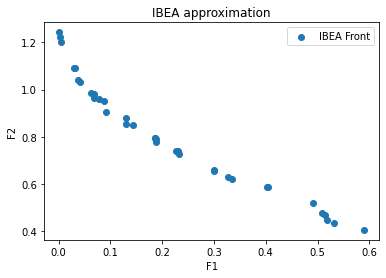

In [5]:
# start the problem
#%matplotlib notebook
problem_name = "ZDT1"
problem = test_problem_builder(problem_name)

# run ibea
# step 0. Let's start with rough approx
ib = IBEA(problem, population_size=32, n_iterations=10, n_gen_per_iter=100,total_function_evaluations=3000)
while ib.continue_evolution():
    ib.iterate()
individuals, objective_values = ib.end()
print("IBEA ideal",ib.population.problem.ideal)
plt.scatter(x=objective_values[:,0], y=objective_values[:,1], label="IBEA Front")
plt.title(f"IBEA approximation")
plt.xlabel("F1")
plt.ylabel("F2")
plt.legend()
plt.show()
# need to get the population
ini_pop = ib.population # so pbea doesn't get only the non dom pop members, and popsize stays the same

## Make PBEA object

In [6]:
delta = 0.05
evolver = PBEA(problem, interact=True, population_size=32, initial_population=ini_pop, 
               n_iterations=10, n_gen_per_iter=100, total_function_evaluations=2000, 
               indicator=preference_indicator, delta=delta)

## Give preference information as a reference point

In [7]:
# ask for preference
pref, plot = evolver.requests()
print(pref.content['message'])

Please provide preferences as a reference point. Reference point cannot be better than ideal point:

f1           0
f2    0.405984
Name: ideal, dtype: object
The reference point will be used to focus the search towards the preferred region.



In [8]:
responses = np.asarray([[0.20, 0.7]])
pref.response = pd.DataFrame([responses[0]], columns=pref.content['dimensions_data'].columns)
pref, plot = evolver.iterate(pref)

# show the best solution closest to the reference point
i2, obj = evolver.end()
# achievement function
dist, index = distance_to_reference_point(obj, responses[0])

print(f"Distance of best solution to the reference point: {dist}")
print(f"Values of best solution to the reference point: {obj[index]}")

message = (f"Current generation number:{evolver._current_gen_count}. "
           f"Is looping back recommended: {'Yes' if evolver.continue_evolution() else 'No'}"
           )
print(message)

Distance of best solution to the reference point: -0.05766204100051964
Values of best solution to the reference point: [0.13466478 0.64233796]
Current generation number:100. Is looping back recommended: Yes


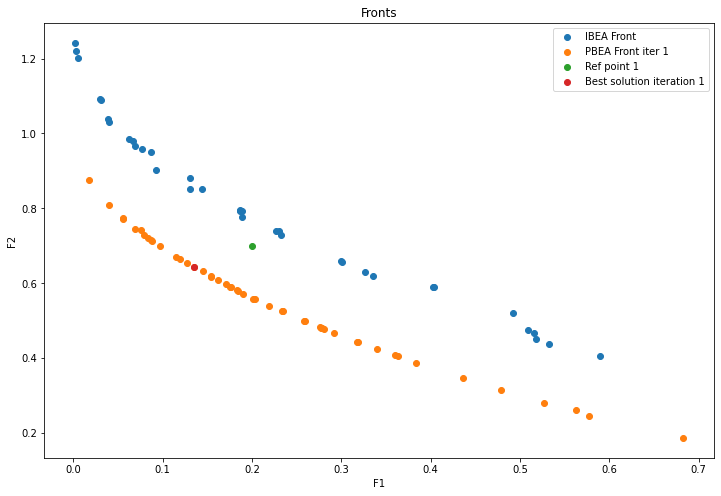

In [9]:
plt.rcParams['figure.figsize'] = [12, 8]

# should select small set of solutions to show to DM. For now we show all.
plt.scatter(x=objective_values[:,0], y=objective_values[:,1], label="IBEA Front")
plt.scatter(x=obj[:,0], y=obj[:,1], label="PBEA Front iter 1")
plt.scatter(x=responses[0][0], y=responses[0][1],  label="Ref point 1")    
plt.scatter(x=obj[index][0], y=obj[index][1], label="Best solution iteration 1")
plt.title(f"Fronts")
plt.xlabel("F1")
plt.ylabel("F2")
plt.legend()
plt.show()

## Giving new preferences

In [10]:
evolver.delta = 0.01 # change delta
pref, plot = evolver.requests()
print(pref.content['message'])

Please provide preferences as a reference point. Reference point cannot be better than ideal point:

f1            0
f2    0.0162649
Name: ideal, dtype: object
The reference point will be used to focus the search towards the preferred region.



In [11]:
responses = np.asarray([[.21, 0.5]])
pref.response = pd.DataFrame([responses[0]], columns=pref.content['dimensions_data'].columns)
pref, plot = evolver.iterate(pref)

# show the best solution closest to the reference point
i3, obj = evolver.end()
# achievement function
dist, index = distance_to_reference_point(obj, responses[0])

print(f"Distance of best solution to the reference point: {dist}")
print(f"Values of best solution to the reference point: {obj[index]}")

message = (f"Current generation number:{evolver._current_gen_count}. "
           f"Is looping back recommended: {'Yes' if evolver.continue_evolution() else 'No'}"
           )
print(message)

Distance of best solution to the reference point: 0.02087071314692332
Values of best solution to the reference point: [0.23087071 0.52044335]
Current generation number:200. Is looping back recommended: Yes


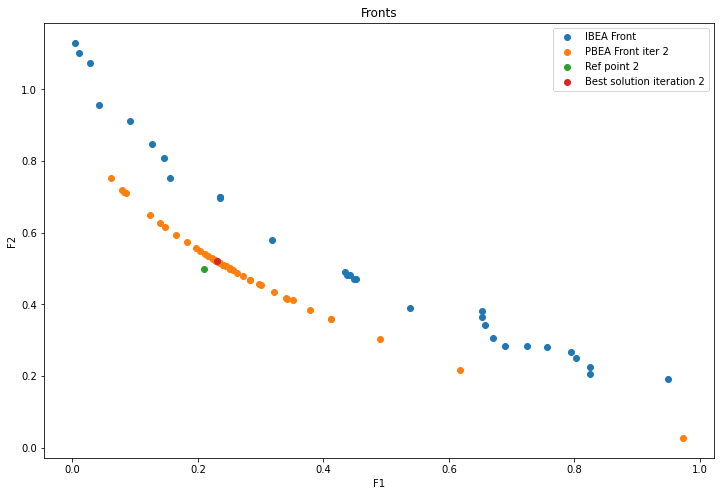

In [12]:
# should select small set of solutions to show to DM. For now we show all.
plt.scatter(x=objective_values[:,0], y=objective_values[:,1], label="IBEA Front")
plt.scatter(x=obj[:,0], y=obj[:,1], label="PBEA Front iter 2")
plt.scatter(x=responses[0][0], y=responses[0][1],  label="Ref point 2")    
plt.scatter(x=obj[index][0], y=obj[index][1], label="Best solution iteration 2")
plt.title(f"Fronts")
plt.xlabel("F1")
#plt.xlim(0,1.2)
#plt.ylim(0,1.2)
plt.ylabel("F2")
plt.legend()
plt.show()

# DTLZ

In [4]:
# start the problem

# I guess works good enough. Has some trouble
#problem_name = "DTLZ1" 
#problem = test_problem_builder(problem_name, n_of_variables=7, n_of_objectives=3)
    
#problem_name = "DTLZ2" # works great
#problem = test_problem_builder(problem_name, n_of_variables=12, n_of_objectives=3)

#problem_name = "DTLZ4" # needs 100 pop to keep good distribution..
#problem = test_problem_builder(problem_name, n_of_variables=12, n_of_objectives=3)

#problem_name = "DTLZ6" # solves
#problem = test_problem_builder(problem_name, n_of_variables=12, n_of_objectives=3)

problem_name = "DTLZ7" # seems to work nice
problem = test_problem_builder(problem_name, n_of_variables=22, n_of_objectives=3)

In [5]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [12, 8]

[0.         0.         3.02420638]


<IPython.core.display.Javascript object>


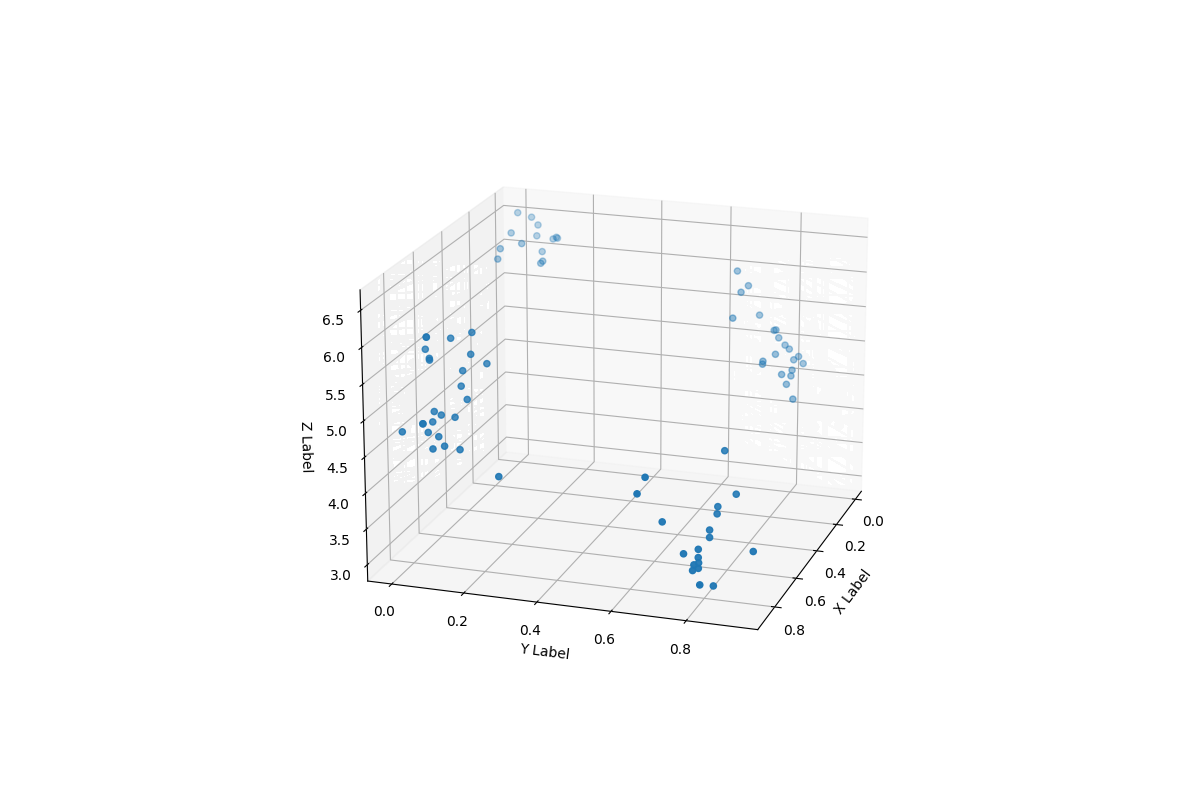

In [6]:
# run ibea
# step 0. Let's start with rough approx
ib = IBEA(problem, population_size=50, n_iterations=10, n_gen_per_iter=100,total_function_evaluations=3000)
while ib.continue_evolution():
    ib.iterate()
individuals, objective_values = ib.end()
print(ib.population.problem.ideal)
# show some of the ibea pop somehow
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(30,45)
ax.scatter(objective_values[:,0],objective_values[:,1],objective_values[:,2], label="IBEA Front")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()
# need to get the population
ini_pop = ib.population 

## PBEA

In [7]:
delta = 0.01
evolver = PBEA(problem, interact=True, population_size=50, initial_population=ini_pop, 
               n_iterations=10, n_gen_per_iter=100, total_function_evaluations=2000, 
               indicator=preference_indicator, kappa=0.05, delta=delta)

### Give preferences as a reference point

In [8]:
# ask for preference
pref, plot = evolver.requests()
print(pref.content['message'])

Please provide preferences as a reference point. Reference point cannot be better than ideal point:

f1          0
f2          0
f3    3.02421
Name: ideal, dtype: object
The reference point will be used to focus the search towards the preferred region.



In [9]:
#responses = np.asarray([[0.3, 0.7, 0.45]])
#responses = np.asarray([[0.2, 0.8, 5.2]])
responses = np.asarray([[0.8, 0.8, 4.2]])
pref.response = pd.DataFrame([responses[0]], columns=pref.content['dimensions_data'].columns)
pref, plot = evolver.iterate(pref)

# show the best solution closest to the reference point
indx, obj = evolver.end()
dist, index = distance_to_reference_point(obj, responses[0])

print(f"Distance of best solution to the reference point: {dist}")
print(f"Values of best solution to the reference point: {obj[index]}")

message = (f"Current generation number:{evolver._current_gen_count}. "
           f"Is looping back recommended: {'Yes' if evolver.continue_evolution() else 'No'}"
           )
print(message)

Distance of best solution to the reference point: -0.09110632874190316
Values of best solution to the reference point: [0.70755886 0.70889367 4.07149663]
Current generation number:81. Is looping back recommended: No


<IPython.core.display.Javascript object>


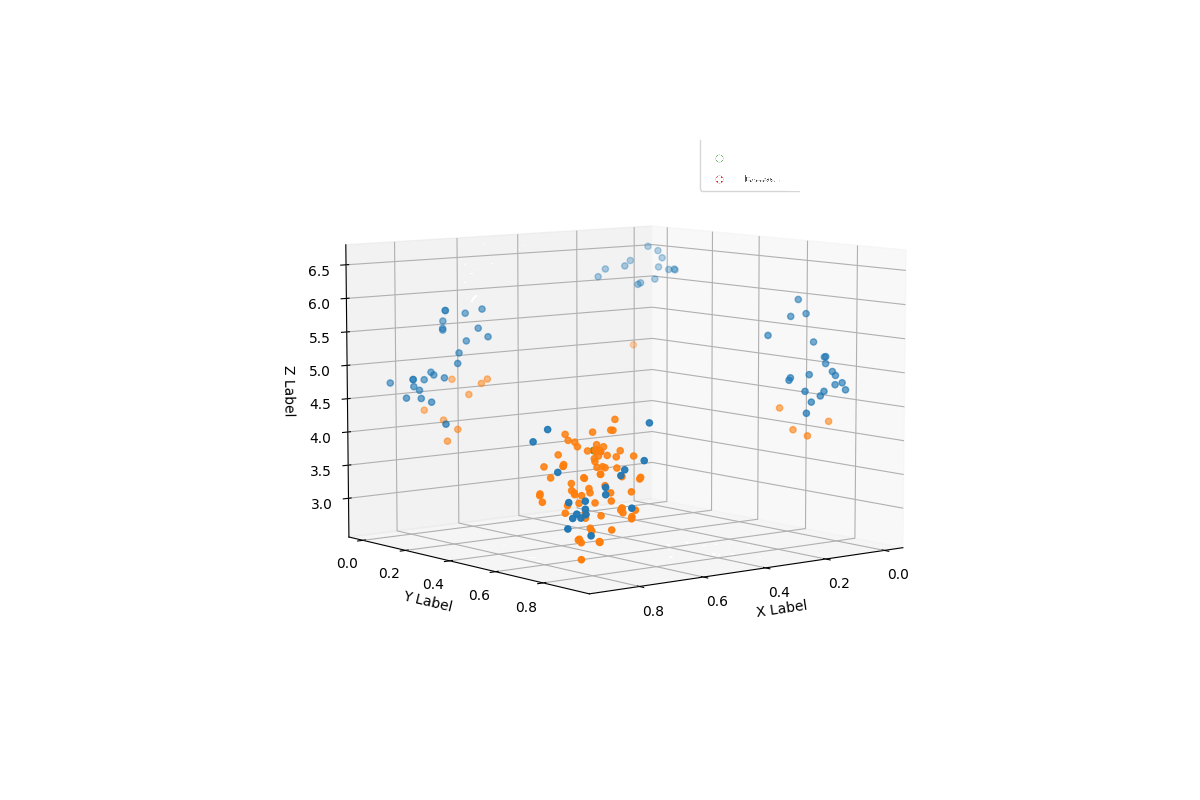

In [10]:
# should select small set of solutions to show to DM. For now we show all.
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(45,45)
ax.scatter(objective_values[:,0],objective_values[:,1],objective_values[:,2], label="IBEA Front")
ax.scatter(obj[:,0], obj[:,1], obj[:,2], label="PBEA Front iter 1")
ax.scatter(responses[0][0], responses[0][1], responses[0][2], label="Ref point 1")
ax.scatter(obj[index][0], obj[index][1], obj[index][2], label="Best solution iteration 1")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#ax.set_zlim(0,5)
ax.legend()
plt.show()

### Give another reference point

In [11]:
evolver.delta = 0.01
pref, plot = evolver.requests()
print(pref.content['message'])

Please provide preferences as a reference point. Reference point cannot be better than ideal point:

f1          0
f2          0
f3    2.69214
Name: ideal, dtype: object
The reference point will be used to focus the search towards the preferred region.



In [12]:
#responses = np.asarray([[0.1, 0.1, 0.95]])
#responses = np.asarray([[0.2, 0.8, .2]])
#responses = np.asarray([[0.0, 0.8, 4.2]])
responses = np.asarray([[0.9, 0.9, 3.2]])

pref.response = pd.DataFrame([responses[0]], columns=pref.content['dimensions_data'].columns)
pref, plot = evolver.iterate(pref)

# show the best solution closest to the reference point
indx, obj = evolver.end()
dist, index = distance_to_reference_point(obj, responses[0])

print(f"Distance of best solution to the reference point: {dist}")
print(f"Values of best solution to the reference point: {obj[index]}")

message = (f"Current generation number:{evolver._current_gen_count}. "
           f"Is looping back recommended: {'Yes' if evolver.continue_evolution() else 'No'}"
           )
print(message)

Distance of best solution to the reference point: -0.1184766646203772
Values of best solution to the reference point: [0.78152334 0.77768842 3.07988212]
Current generation number:161. Is looping back recommended: No


<IPython.core.display.Javascript object>


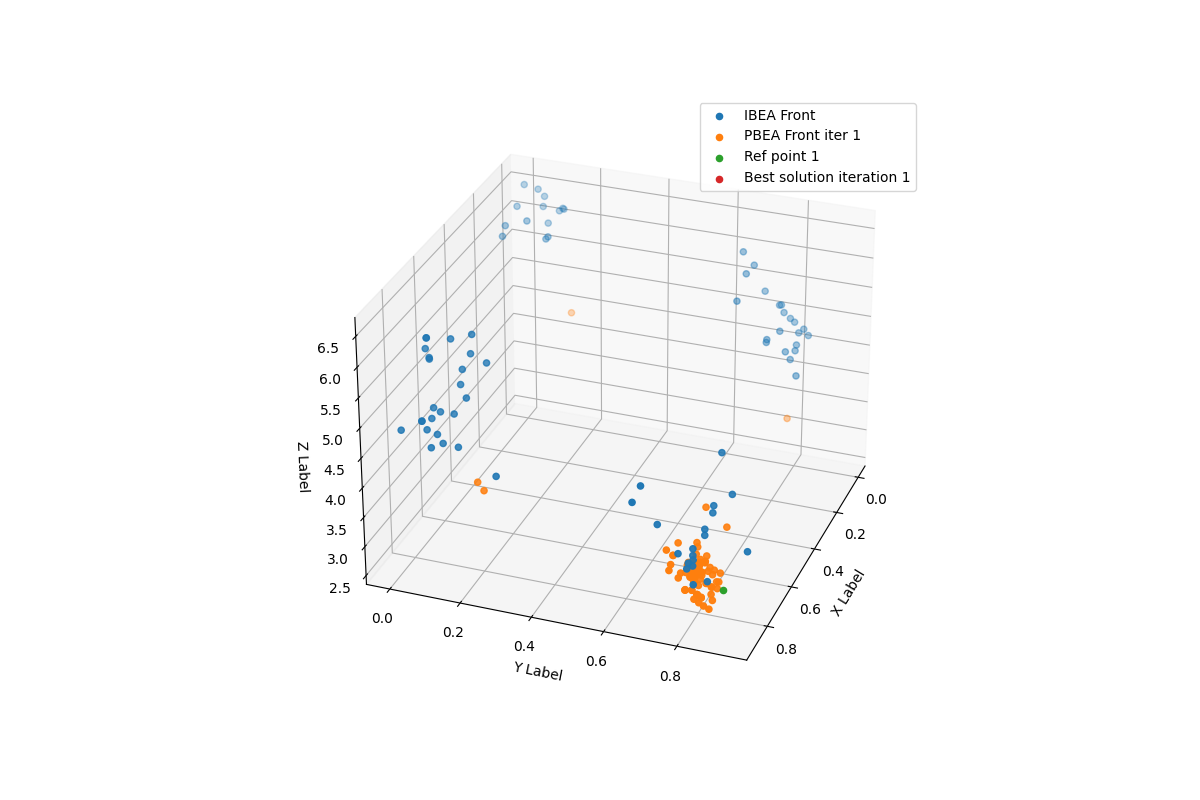

In [13]:
# should select small set of solutions to show to DM. For now we show all.
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(45,45)
ax.scatter(objective_values[:,0],objective_values[:,1],objective_values[:,2], label="IBEA Front")
ax.scatter(obj[:,0], obj[:,1], obj[:,2], label="PBEA Front iter 1")
ax.scatter(responses[0][0], responses[0][1], responses[0][2], label="Ref point 1")
ax.scatter(obj[index][0], obj[index][1], obj[index][2], label="Best solution iteration 1")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend()
plt.show()